# Data Exploration and Visulization

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from data_cleaner import clean_data, merge_dataframes


In [2]:
# get the raw scraped data that was stored as a csv file
df15 = pd.read_csv('data/marathon_results_2015.csv')
df16 = pd.read_csv('data/marathon_results_2016.csv')
df17 = pd.read_csv('data/marathon_results_2017.csv')
df18 = pd.read_csv('data/marathon_results_2018.csv')
df18.rename(columns={'Blank': 'Unnamed'}, inplace = True)
print(df18.shape)
df18.head()

(24087, 26)


,Unnamed: 0,Unnamed: 0.1,Bib,Name,Age,M/F,City,State,Country,Citizen,...,25K,30K,35K,40K,Pace,Proj. Time,Official Time,Overall,Gender,Division
0,0,0,189,"Ash, Alan",26,M,Atmore,AL,USA,NaN,...,1:31:16,1:50:19,2:09:22,2:28:08,0:05:58,NaN,2:36:04,63,63,59
1,1,1,855,"Goodman, John Mark",38,M,Birmingham,AL,USA,NaN,...,1:34:33,1:53:49,2:13:27,2:33:06,0:06:11,NaN,2:41:52,187,186,173
2,2,2,1049,"Mcclung, Joshua",34,M,Birmingham,AL,USA,NaN,...,1:35:31,1:55:14,2:15:14,2:34:45,0:06:15,NaN,2:43:42,247,246,226
3,3,3,303,"Graham, James",26,M,Birmingham,AL,USA,NaN,...,1:33:09,1:52:29,2:13:49,2:37:17,0:06:23,NaN,2:47:07,385,377,346
4,4,4,5267,"Pierce, Nathaniel",31,M,Huntsville,AL,USA,NaN,...,1:40:23,2:00:42,2:21:22,2:41:26,0:06:30,NaN,2:50:19,608,593,536


In [3]:
# use custom cleaner script to clean the data in preparation for analysis
df15_clean = clean_data(df15.copy(), 2015)
df16_clean = clean_data(df16.copy(), 2016)
df17_clean = clean_data(df17.copy(), 2017)
df18_clean = clean_data(df18.copy(), 2018)
df18_clean.head()  

,Bib,Name,Age,finish_time,overall_rank,gender_rank,division_rank,pace_rate,temp,humidity,wind,Gender_F,Gender_M
0,189,"Ash, Alan",26,9364,0.002439,0.004436,0.010190,1.84,44,1.0,17,0,1
1,855,"Goodman, John Mark",38,9712,0.007239,0.013096,0.029879,1.51,44,1.0,17,0,1
2,1049,"Mcclung, Joshua",34,9822,0.009562,0.017320,0.039033,1.98,44,1.0,17,0,1
3,303,"Graham, James",26,10027,0.014905,0.026544,0.059758,6.95,44,1.0,17,0,1
4,5267,"Pierce, Nathaniel",31,10219,0.023538,0.041752,0.092573,0.48,44,1.0,17,0,1


In [4]:
# there are no NULL values and all values are numerical
df18_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24087 entries, 0 to 24086
Data columns (total 13 columns):
Bib              24087 non-null int64
Name             24087 non-null object
Age              24087 non-null int64
finish_time      24087 non-null int64
overall_rank     24087 non-null float64
gender_rank      24087 non-null float64
division_rank    24087 non-null float64
pace_rate        24087 non-null float64
temp             24087 non-null int64
humidity         24087 non-null float64
wind             24087 non-null int64
Gender_F         24087 non-null uint8
Gender_M         24087 non-null uint8
dtypes: float64(5), int64(5), object(1), uint8(2)
memory usage: 2.3+ MB


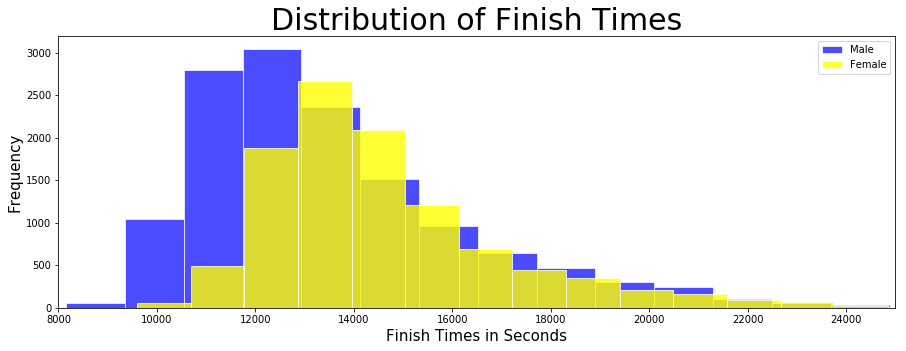

In [5]:
# visualize the distribution of the finish times
female = df18_clean[df18_clean['Gender_F']==1]
male = df18_clean[df18_clean['Gender_M']==1]

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.hist(male['finish_time'], bins=20, color='blue', alpha=0.7, 
        histtype='bar', ec='ivory', label='Male', linewidth=1)
ax.hist(female['finish_time'], bins=20, color='yellow', alpha=0.8, 
        histtype='bar', ec='ivory', label='Female', linewidth=1)

ax.set_xlim([8000, 25000])
ax.set_title('Distribution of Finish Times', size=30)
ax.set_xlabel('Finish Times in Seconds', size=15)
ax.set_ylabel('Frequency', size=15)
ax.legend();
# poisson??? or just normal right skewed? 

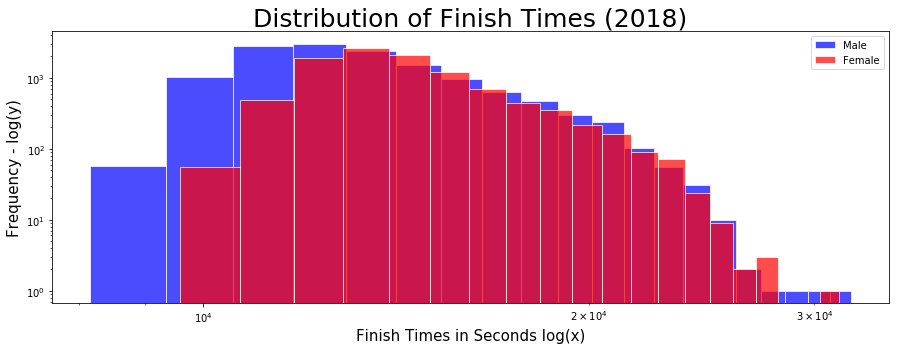

In [6]:
# visualize the distribution in log x to check for normal distribution
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.hist(male['finish_time'], bins=20, color='blue', alpha=0.7, 
        histtype='bar', ec='ivory', label='Male', linewidth=1)
ax.hist(female['finish_time'], bins=20, color='red',alpha=0.7, 
        histtype='bar', ec='ivory', label='Female', linewidth=1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Distribution of Finish Times (2018)', size=25)
ax.set_xlabel('Finish Times in Seconds log(x)', size=15)
ax.set_ylabel('Frequency - log(y)', size=15)
ax.legend();

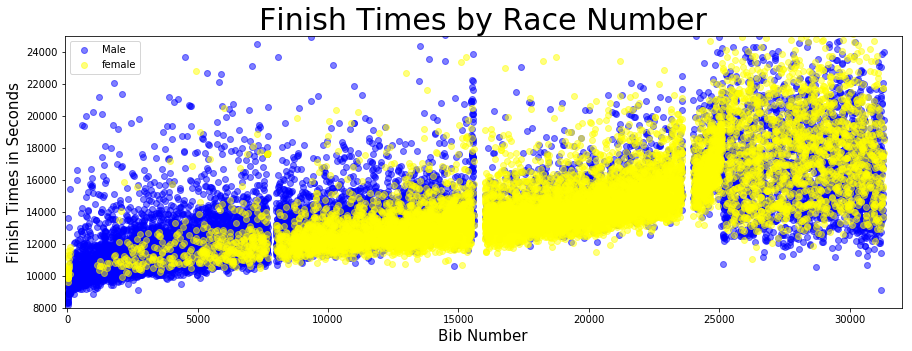

In [7]:
# visualize the finish times across the bib numbers
female = df18_clean[df18_clean['Gender_F']==1]
male = df18_clean[df18_clean['Gender_M']==1]

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.scatter(male['Bib'], male['finish_time'], color='blue', alpha=0.5, marker='o', label='Male')
ax.scatter(female['Bib'], female['finish_time'], color='yellow', alpha=0.5, marker='o', label='female')
ax.set_ylim([8000, 25000])
ax.set_xlim([-100, 32000])
ax.set_title('Finish Times by Race Number', size=30)
ax.set_ylabel('Finish Times in Seconds', size=15)
ax.set_xlabel('Bib Number', size=15)
ax.legend();  # 2018 seemed to have the most variance 

In [8]:
# Confirm the variance of the men is larger than that of the women

for df in [df15_clean, df16_clean, df17_clean, df18_clean]:
    female = df[df['Gender_F']==1]
    male = df[df['Gender_M']==1]
    female['finish_time'].var()

print(male['finish_time'].var(),female['finish_time'].var())

7499553.682194331 5917892.637323928


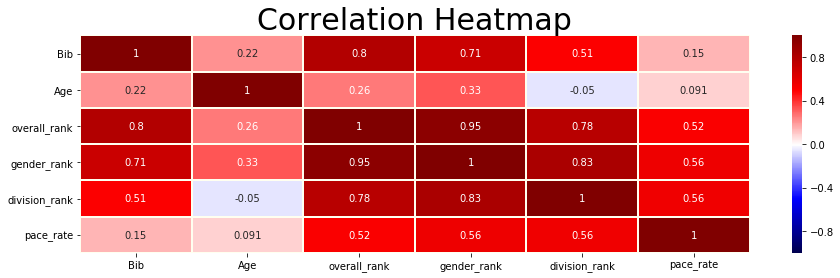

In [9]:
# visualize a heatmap of the independant variables to check for correlation between them
df17_corr = df17_clean[['Bib', 'Age', 'overall_rank', 'gender_rank', 
                  'division_rank', 'pace_rate']].corr()

fig, ax = plt.subplots(figsize=(15,4))
sns.heatmap(df17_corr, ax=ax, cmap="seismic", annot=True, 
            vmin=-1, vmax=1, linewidths=1, linecolor='ivory')
ax.set_title('Correlation Heatmap', size=30);


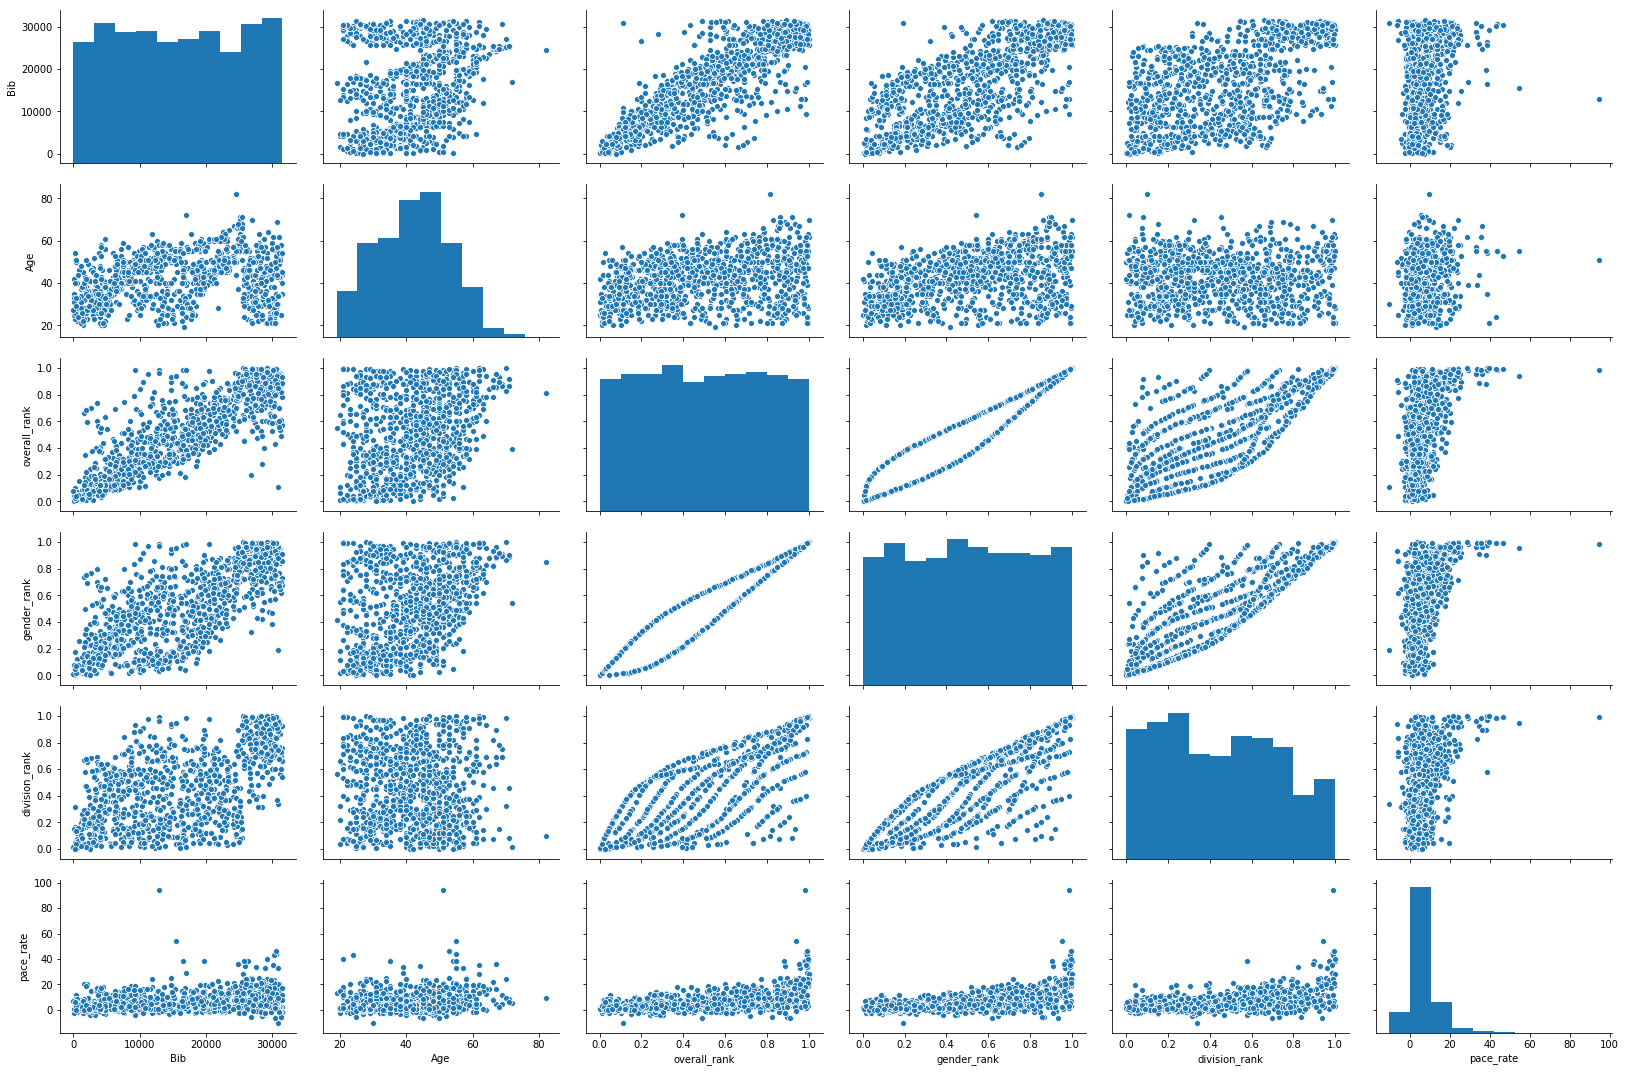

In [10]:
# visualize a pairplot of the data to get a feel for any anomolies
corr_test = df15_clean[['Bib', 'Age', 'overall_rank', 'gender_rank', 
                  'division_rank', 'pace_rate']].dropna().sample(1000)
sns.pairplot(corr_test, aspect=1.5);  # consider interaction with gender and gender_rank 

In [11]:
# find the names of the legacy runners in consecutive years
all_legacy_runners = (list(set(df15_clean['Name'])
                       .intersection(df16_clean['Name'])
                       .intersection(df17_clean['Name'])
                       .intersection(df18_clean['Name'])))  #1027 count

legacy15_16 = list(set(df15['Name']).intersection(df16['Name']))  # 5530 count
legacy16_17 = list(set(df16['Name']).intersection(df17['Name']))  # 4995 count
legacy17_18 = list(set(df17['Name']).intersection(df18['Name']))  # 3403 count

In [12]:
# filter the years based on the legacy runners names
# remove the repetive columns after merging
# append the consecutive race finish time inplace of the current finish time
df_legacy15_16 = merge_dataframes(df15_clean, df16_clean, legacy15_16)
df_legacy16_17 = merge_dataframes(df16_clean, df17_clean, legacy16_17)
df_legacy17_18 = merge_dataframes(df17_clean, df18_clean, legacy17_18)
print(df_legacy15_16.shape, df_legacy16_17.shape, df_legacy17_18.shape)

(5458, 13) (4919, 13) (3274, 13)


In [13]:
import statsmodels.api as sm

X = df_legacy15_16[['Bib', 'Age', 'overall_rank', 'gender_rank', 'division_rank', 
                'pace_rate', 'temp', 'humidity', 'wind', 'Gender_F', 'Gender_M']]
y =  df_legacy15_16[['finish_time']]

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance 
# this gives a high level view of the OLS regression results 
# a quick way to see if any variables could be illiminated
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:            finish_time   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     1853.
Date:                Sun, 27 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:54:55   Log-Likelihood:                -46889.
No. Observations:                5458   AIC:                         9.379e+04
Df Residuals:                    5450   BIC:                         9.385e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Bib               0.0530      0.005     10.971

In [14]:
# Store the cleaned data into csv files for modeling in a later notebook
df_legacy15_16.to_csv("data/legacy_runners_15-16.csv")
df_legacy16_17.to_csv("data/legacy_runners_16-17.csv")
df_legacy17_18.to_csv("data/legacy_runners_17-18.csv")

In [15]:
# curios of the reult of just the overall rank against the finish time
X_true = df_legacy15_16[['overall_rank']]
y =  df_legacy15_16[['finish_time']]

# Create your model
X = sm.add_constant(X_true)
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:            finish_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                 1.242e+04
Date:                Sun, 27 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:54:56   Log-Likelihood:                -46973.
No. Observations:                5458   AIC:                         9.395e+04
Df Residuals:                    5456   BIC:                         9.396e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.068e+04     32.882    324.780   

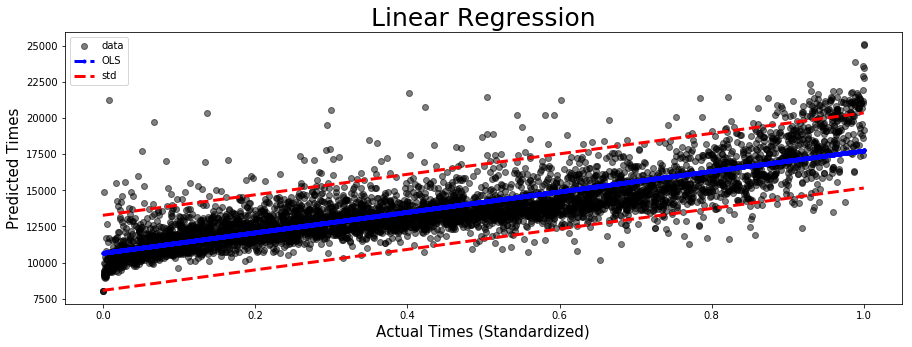

In [16]:
# graph the results from above 
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(fit)

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(X_true, y, 'o', label="data", c = 'black', alpha=0.5)                       # plot given data
ax.plot(X_true, fit.fittedvalues, 'b--.', label="OLS", linewidth=3) # plot predictions
ax.plot(X_true, iv_u, 'r--', label='std', linewidth=3)                                # plot std deviations
ax.plot(X_true, iv_l, 'r--', linewidth=3)
ax.set_title('Linear Regression', size=25)
ax.set_xlabel('Actual Times (Standardized)', size=15)
ax.set_ylabel('Predicted Times', size=15)
ax.legend(loc='best')
plt.show()